In [ ]:
!pip install nba_api

Enter Player ID: 201939
Enter Team ID: 1610612744
Enter start date (YYYY-MM-DD): 2025-02-10
Enter end date (YYYY-MM-DD): 2025-04-15


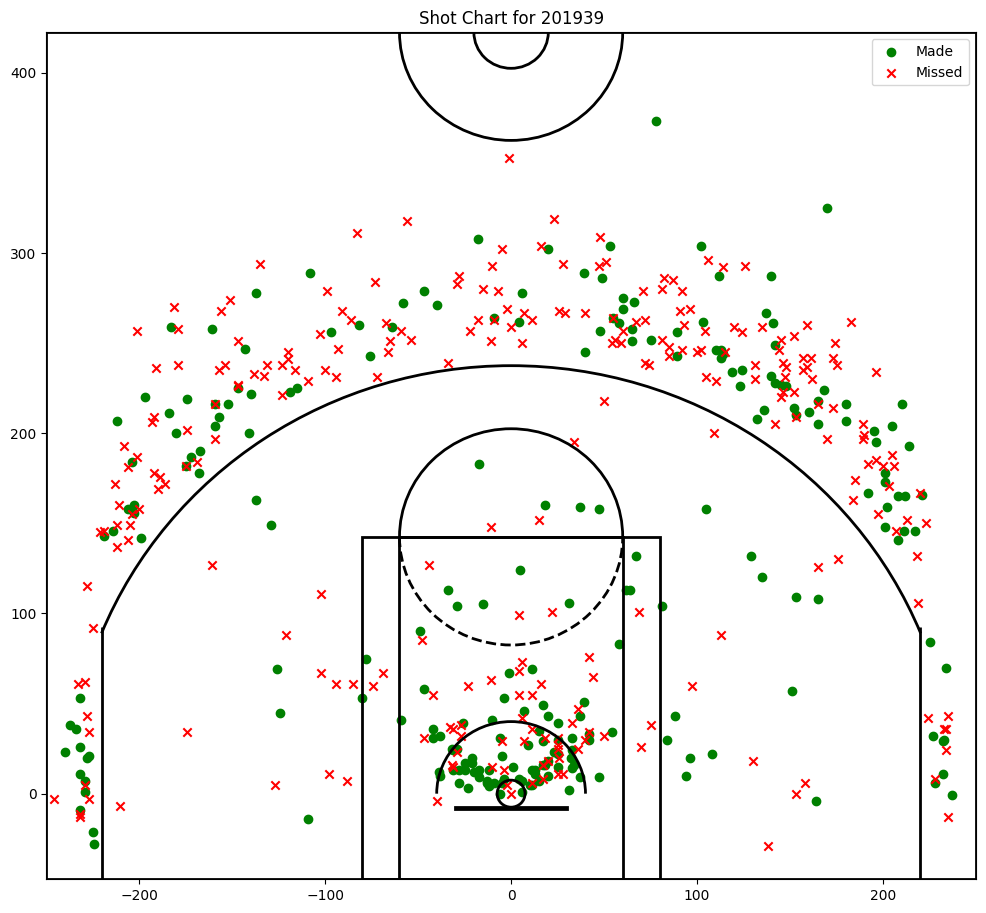

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from nba_api.stats.endpoints import shotchartdetail


from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)

    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)
    for element in court_elements:
        ax.add_patch(element)

    return ax

#plt.figure(figsize=(12,11))
#draw_court(outer_lines=True)
#plt.xlim(-300,300)
#plt.ylim(-100,500)
#plt.show()

def get_shot_chart_data(player_id, team_id):
    shot_chart = shotchartdetail.ShotChartDetail(player_id=player_id, team_id=team_id, context_measure_simple='FGA')
    shot_chart_df = shot_chart.get_data_frames()[0]
    shot_chart_df['GAME_DATE'] = pd.to_datetime(shot_chart_df['GAME_DATE'])
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    filtered_df = shot_chart_df[
        (shot_chart_df['GAME_DATE'] >= start_date) &
        (shot_chart_df['GAME_DATE'] <= end_date)
    ]

    return filtered_df[['LOC_X', 'LOC_Y', 'SHOT_MADE_FLAG']]
    #return shot_chart_df[['LOC_X', 'LOC_Y', 'SHOT_MADE_FLAG']]  #### THIS CAN BE CHANGED, SHOTMADE, SHOTATTEMPT, Only select necessary columns


def plot_shot_chart_density(shot_chart_df,player_id, start_date, end_date):
    joint_plot = sns.jointplot(x=shot_chart_df['LOC_X'], y=shot_chart_df['LOC_Y'], kind='kde', cmap='Blues', fill=True)
    draw_court(ax=joint_plot.ax_joint)
    joint_plot.ax_joint.set_xlim(-250, 250)
    joint_plot.ax_joint.set_ylim(-47.5, 422.5)

    # Show the plot
    plt.show()


player_id = input("Enter Player ID: ")
team_id = input("Enter Team ID: ")
start_date_str = input("Enter start date (YYYY-MM-DD): ")
end_date_str = input("Enter end date (YYYY-MM-DD): ")
shot_chart_data = get_shot_chart_data(player_id, team_id)

#plot_shot_chart_density(shot_chart_data)



#############################################


def plot_shot_chart_points(shot_chart_df):

    plt.figure(figsize=(12, 11))  # Adjust figure size as needed

    # filter data for made and missed shots
    made_shots = shot_chart_data[shot_chart_data['SHOT_MADE_FLAG'] == 1]
    missed_shots = shot_chart_data[shot_chart_data['SHOT_MADE_FLAG'] == 0]

    # Plot
    plt.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], color='green', marker='o', label='Made')
    plt.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], color='red', marker='x', label='Missed')

    # use your draw_court
    draw_court(outer_lines=True)

    # Set plot limits for better visualization
    plt.xlim(-250, 250)
    plt.ylim(-47.5, 422.5)

    # legend
    plt.legend()
    plt.title("Shot Chart for "+ player_id)
    plt.show()
plot_shot_chart_points(shot_chart_data)


In [ ]:
from bokeh.io import output_notebook
output_notebook()
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool, LinearColorMapper
from nba_api.stats.endpoints import shotchartdetail
import pandas as pd
import datetime
from bokeh.palettes import Category10  # or any other palette
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool, LinearColorMapper
from bokeh.palettes import Category10

def plot_shot_chart_bokeh(shot_chart_data):

    player_id = input("Enter Player ID: ")
    team_id = input("Enter Team ID: ")
    start_date = input("Enter start date (YYYY-MM-DD): ")
    end_date = input("Enter end date (YYYY-MM-DD): ")
    shot_chart = shotchartdetail.ShotChartDetail(player_id=player_id, team_id=team_id, context_measure_simple='FGA')
    shot_chart_df = shot_chart.get_data_frames()[0]
    shot_chart_df[['LOC_X', 'LOC_Y', 'SHOT_MADE_FLAG', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE','PERIOD']]
    shot_chart_df['GAME_DATE'] = pd.to_datetime(shot_chart_df['GAME_DATE'])
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    filtered_shot_chart_df = shot_chart_df[
        (shot_chart_df['GAME_DATE'] >= start_date) & (shot_chart_df['GAME_DATE'] <= end_date)
    ]
    source = ColumnDataSource(data={
        'x': filtered_shot_chart_df['LOC_X'],
        'y': filtered_shot_chart_df['LOC_Y'],
        'made': filtered_shot_chart_df['SHOT_MADE_FLAG'],
        'text': ["Made" if m else "Missed" for m in filtered_shot_chart_df['SHOT_MADE_FLAG']],
        'SHOT_RANGE': filtered_shot_chart_df['SHOT_ZONE_AREA'],
        'SHOT_DISTANCE': filtered_shot_chart_df['SHOT_DISTANCE'],
        'PERIOD': filtered_shot_chart_df['PERIOD']
    })

    p = figure(width=600, height=600, title="Shot Chart",
               tools="pan,wheel_zoom,reset",
               x_range=(-250, 250), y_range=(-50, 450))

    # color Map for made and missed shots (0=Missed=red, 1=Made=green)
    color_mapper = LinearColorMapper(palette=['red', 'green'], low=0, high=1)

    # Scatter plot with colors based on made/missed shots, using the color mapper
    p.scatter(x='x', y='y', size=10,
              color={'field': 'made', 'transform': color_mapper},
              source=source)
    hover = HoverTool()
    hover.tooltips = [("Shot", "@text"), ("SHOT_RANGE", "@SHOT_RANGE"), ("SHOT_DISTANCE", "@SHOT_DISTANCE"), ("Quater", "@PERIOD")]
    p.add_tools(hover)
    show(p)
plot_shot_chart_bokeh(shot_chart_data)

In [ ]:
from bokeh.io import output_notebook
output_notebook()
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool, Legend, LegendItem, LinearColorMapper
from nba_api.stats.endpoints import shotchartdetail
import pandas as pd
from bokeh.transform import factor_cmap
from bokeh.palettes import Viridis256

def plot_shot_chart_bokeh_zones():
    player_id = input("Enter Player ID: ")
    team_id = input("Enter Team ID: ")
    start_date = input("Enter start date (YYYY-MM-DD): ")
    end_date = input("Enter end date (YYYY-MM-DD): ")

    #  FIND DATA
    shot_chart = shotchartdetail.ShotChartDetail(
        player_id=player_id, team_id=team_id, context_measure_simple='FGA')
    shot_chart_df = shot_chart.get_data_frames()[0]
    shot_chart_df['GAME_DATE'] = pd.to_datetime(shot_chart_df['GAME_DATE'])
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    filtered_shot_chart_df = shot_chart_df[
        (shot_chart_df['GAME_DATE'] >= start_date) &
        (shot_chart_df['GAME_DATE'] <= end_date)]

    # shooting percentage for each zone
    zone_stats = filtered_shot_chart_df.groupby('SHOT_ZONE_BASIC').agg(
        total_shots=('SHOT_MADE_FLAG', 'count'),
        made_shots=('SHOT_MADE_FLAG', 'sum')
    ).reset_index()
    zone_stats['shooting_percentage'] = (zone_stats['made_shots'] / zone_stats['total_shots']) * 100

    # Assign colors to shot zones
    min_shooting = zone_stats['shooting_percentage'].min()
    max_shooting = zone_stats['shooting_percentage'].max()
    color_mapper = LinearColorMapper(palette=Viridis256, low=min_shooting, high=max_shooting)

    p = figure(width=600, height=600, title="Shot Chart by Zone",
               tools="pan,wheel_zoom,reset",
               x_range=(-250, 250), y_range=(-50, 450))
    legend_items = []

    # Plot shots per zone
    for _, row in zone_stats.iterrows():
        zone = row['SHOT_ZONE_BASIC']
        zone_data = filtered_shot_chart_df[filtered_shot_chart_df['SHOT_ZONE_BASIC'] == zone]
        source = ColumnDataSource(data={
            'x': zone_data['LOC_X'],
            'y': zone_data['LOC_Y'],
            'text': ["Made" if m else "Missed" for m in zone_data['SHOT_MADE_FLAG']],
            'SHOT_RANGE': zone_data['SHOT_ZONE_AREA'],
            'SHOT_DISTANCE': zone_data['SHOT_DISTANCE'],
            'PERIOD': zone_data['PERIOD'],
            'shooting_percentage': [row['shooting_percentage']] * len(zone_data)
        })

        glyph = p.scatter(x='x', y='y', size=10,
                          color={'field': 'shooting_percentage', 'transform': color_mapper},
                          alpha=0.8, source=source)

        legend_items.append(
            LegendItem(label=f"{zone}: {row['shooting_percentage']:.1f}%", renderers=[glyph]))

    #hover tool
    hover = HoverTool(tooltips=[("Shot", "@text"), ("SHOT_RANGE", "@SHOT_RANGE"),
                                ("SHOT_DISTANCE", "@SHOT_DISTANCE"), ("Quarter", "@PERIOD"),
                                ("Shooting %", "@shooting_percentage{0.1f}%")])
    p.add_tools(hover)

    #legend
    legend = Legend(items=legend_items, location="top_right")
    p.add_layout(legend)
    show(p)

plot_shot_chart_bokeh_zones()
